# Analisis exploratorio de los datos tomados con sensores integrados en celular

Para la toma de datos se utilizó la aplicación para Android Phyphox

## Se definen 4 tipos de movimiento


*   Rotación de mano(muñeca) hacia la izquiera
*   Rotación de mano(muñeca) hacia la derecha
*   Levantamiento de brazo
*   Movimiento de brazo hacia hombro izquierdo

Cada movimiento se inicia desde una pocisión de reposo/neutra donde ambos brazos se tienen completamente extendidos hacia abajo y se sostiene el celular con la mano derecha



# Imagenes ilustrativas de cada movimiento

*   Rotación de mano(muñeca) hacia la izquiera

  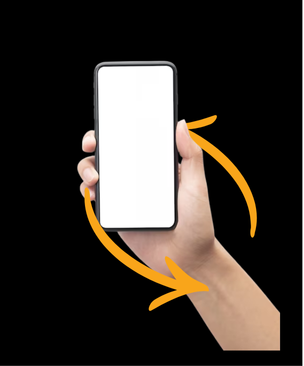
*   Rotación de mano(muñeca) hacia la derecha
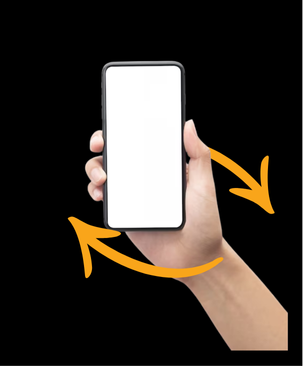
*   Levantamiento de brazo
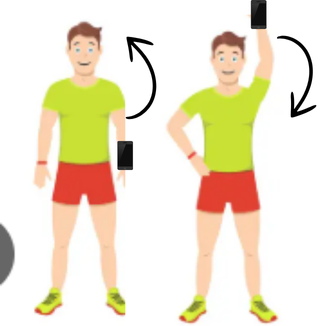

*   Movimiento de brazo hacia hombro izquierdo
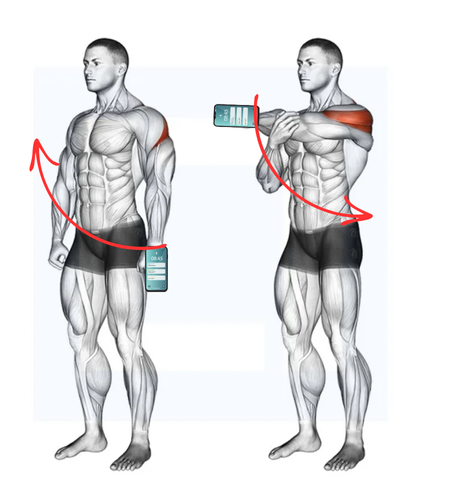

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_accel_gyro = "/content/drive/MyDrive/sensadoFisio/rotIzq_Gyros_Accel.csv"


df_accel_gyro = pd.read_csv(df_accel_gyro)



print("Data:")
print(df_accel_gyro.head())



Data:
     time   GyroX   GyroY   GyroZ  AccelX  AccelY  AccelZ
0  0.0275 -0.1830 -0.0148  0.1130    4.05   -8.88   1.350
1  0.0299 -0.1570 -0.0447  0.0937    3.84   -8.95   1.180
2  0.0322 -0.1300 -0.0814  0.0796    3.74   -9.02   0.991
3  0.0346 -0.1070 -0.1190  0.0638    3.71   -9.08   0.816
4  0.0370 -0.0919 -0.1460  0.0515    3.75   -9.14   0.682


In [ ]:
df_accel_gyro

,time,GyroX,GyroY,GyroZ,AccelX,AccelY,AccelZ
0,0.0275,-0.1830,-0.0148,0.11300,4.05,-8.88,1.350
1,0.0299,-0.1570,-0.0447,0.09370,3.84,-8.95,1.180
2,0.0322,-0.1300,-0.0814,0.07960,3.74,-9.02,0.991
3,0.0346,-0.1070,-0.1190,0.06380,3.71,-9.08,0.816
4,0.0370,-0.0919,-0.1460,0.05150,3.75,-9.14,0.682
...,...,...,...,...,...,...,...
76133,180.0000,-0.0216,0.0505,0.00573,1.88,-9.82,1.550
76134,180.0000,-0.0204,0.0567,0.00573,1.89,-9.80,1.540
76135,180.0000,-0.0173,0.0658,0.00512,1.91,-9.80,1.550
76136,180.0000,-0.0131,0.0768,0.00267,1.92,-9.79,1.560


## Muestra de las mediciones

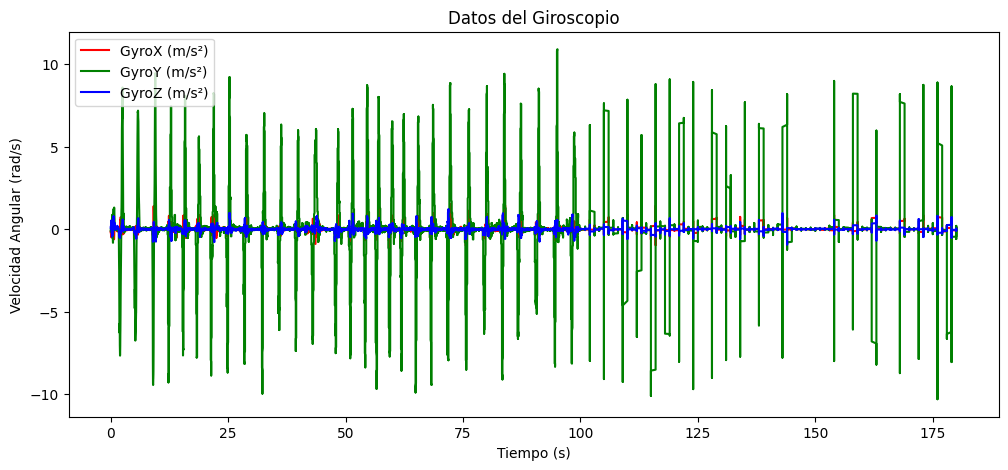

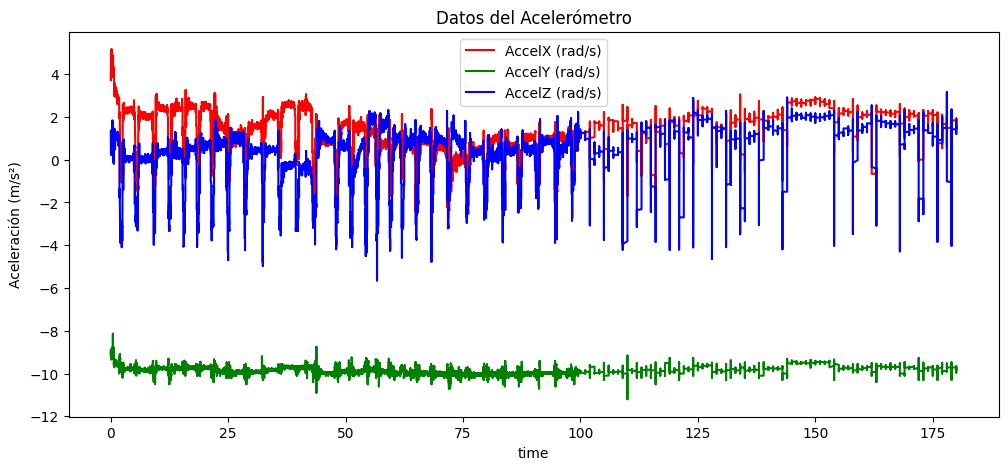

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 5))
plt.plot(df_accel_gyro["time"], df_accel_gyro["GyroX"], label="GyroX (m/s²)", color='r')
plt.plot(df_accel_gyro["time"], df_accel_gyro["GyroY"], label="GyroY (m/s²)", color='g')
plt.plot(df_accel_gyro["time"], df_accel_gyro["GyroZ"], label="GyroZ (m/s²)", color='b')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad Angular (rad/s)")
plt.title("Datos del Giroscopio")
plt.legend()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(df_accel_gyro["time"], df_accel_gyro["AccelX"], label="AccelX (rad/s)", color='r')
plt.plot(df_accel_gyro["time"], df_accel_gyro["AccelY"], label="AccelY (rad/s)", color='g')
plt.plot(df_accel_gyro["time"], df_accel_gyro["AccelZ"], label="AccelZ (rad/s)", color='b')
plt.xlabel("time")
plt.ylabel("Aceleración (m/s²)")
plt.title("Datos del Acelerómetro")
plt.legend()
plt.show()


In [ ]:

accel_stats = df_accel_gyro.describe()

print("Estadísticas del dataset:\n", accel_stats)

Estadísticas del dataset:
                time         GyroX         GyroY         GyroZ        AccelX  \
count  76138.000000  76138.000000  76138.000000  76138.000000  76138.000000   
mean      90.028030      0.014628     -0.000560     -0.005637      1.374883   
std       51.963702      0.201000      2.531938      0.153883      0.965393   
min        0.027500     -1.110000    -10.300000     -0.926000     -2.770000   
25%       45.000000     -0.035000     -0.077100     -0.032100      0.788000   
50%       90.000000     -0.001450      0.013900     -0.002830      1.530000   
75%      135.000000      0.032100      0.116000      0.020400      2.110000   
max      180.000000      1.700000     10.900000      1.200000      5.160000   

             AccelY        AccelZ  
count  76138.000000  76138.000000  
mean      -9.835030      0.393527  
std        0.181666      1.363452  
min      -11.200000     -5.650000  
25%       -9.960000      0.047900  
50%       -9.840000      0.735000  
75%      

## Segmentación de ventanas

In [ ]:
import pandas as pd

def segmentar_y_etiquetar(archivo, etiqueta, ventana_muestras=50, solapamiento=25):
    datos = pd.read_csv(archivo)
    ventanas = []
    etiquetas = []
    inicio = 0
    while inicio + ventana_muestras <= len(datos):
        fin = inicio + ventana_muestras
        ventana = datos.iloc[inicio:fin]
        ventanas.append(ventana)
        etiquetas.append(etiqueta)
        inicio += solapamiento
    return ventanas, etiquetas


ventanas_izquierda, etiquetas_izquierda = segmentar_y_etiquetar(
    "/content/drive/MyDrive/sensadoFisio/rotIzq_Gyros_Accel.csv",
    etiqueta="izquierda"
)


In [ ]:
df_accel_gyro

,time,GyroX,GyroY,GyroZ,AccelX,AccelY,AccelZ
0,0.0275,-0.1830,-0.0148,0.11300,4.05,-8.88,1.350
1,0.0299,-0.1570,-0.0447,0.09370,3.84,-8.95,1.180
2,0.0322,-0.1300,-0.0814,0.07960,3.74,-9.02,0.991
3,0.0346,-0.1070,-0.1190,0.06380,3.71,-9.08,0.816
4,0.0370,-0.0919,-0.1460,0.05150,3.75,-9.14,0.682
...,...,...,...,...,...,...,...
76133,180.0000,-0.0216,0.0505,0.00573,1.88,-9.82,1.550
76134,180.0000,-0.0204,0.0567,0.00573,1.89,-9.80,1.540
76135,180.0000,-0.0173,0.0658,0.00512,1.91,-9.80,1.550
76136,180.0000,-0.0131,0.0768,0.00267,1.92,-9.79,1.560


In [ ]:
import pandas as pd

def segmentar_y_etiquetar(archivo, etiqueta, ventana_muestras=50, solapamiento=25):
    datos = pd.read_csv(archivo)
    ventanas = []
    etiquetas = []
    inicio = 0

    while inicio + ventana_muestras <= len(datos):
        fin = inicio + ventana_muestras
        ventana = datos.iloc[inicio:fin].copy()
        ventana["etiqueta"] = etiqueta
        ventanas.append(ventana)
        etiquetas.append(etiqueta)
        inicio += solapamiento

    return ventanas, etiquetas


ventanas_izquierda, etiquetas_izquierda = segmentar_y_etiquetar(
    "/content/drive/MyDrive/sensadoFisio/rotIzq_Gyros_Accel.csv",
    etiqueta="izquierda"
)

,time,GyroX,GyroY,GyroZ,AccelX,AccelY,AccelZ
0,0.0275,-0.1830,-0.0148,0.11300,4.05,-8.88,1.350
1,0.0299,-0.1570,-0.0447,0.09370,3.84,-8.95,1.180
2,0.0322,-0.1300,-0.0814,0.07960,3.74,-9.02,0.991
3,0.0346,-0.1070,-0.1190,0.06380,3.71,-9.08,0.816
4,0.0370,-0.0919,-0.1460,0.05150,3.75,-9.14,0.682
...,...,...,...,...,...,...,...
76133,180.0000,-0.0216,0.0505,0.00573,1.88,-9.82,1.550
76134,180.0000,-0.0204,0.0567,0.00573,1.89,-9.80,1.540
76135,180.0000,-0.0173,0.0658,0.00512,1.91,-9.80,1.550
76136,180.0000,-0.0131,0.0768,0.00267,1.92,-9.79,1.560


In [ ]:

movimientos = {
    "rotIzq_Gyros_Accel.csv": "izquierda",
    "rotderecha_Accel_Gyro.csv": "derecha",
    "upDown_Accel_Gyro.csv": "arriba",
    "upLeft_Gyro_Accel.csv": "hombro_izquierdo"
}

todas_ventanas = []
todas_etiquetas = []

for archivo, etiqueta in movimientos.items():
    ruta = f"/content/drive/MyDrive/sensadoFisio/{archivo}"
    ventanas, etiquetas = segmentar_y_etiquetar(ruta, etiqueta)
    todas_ventanas.extend(ventanas)
    todas_etiquetas.extend(etiquetas)

# Combinar
dataset_final = pd.concat(todas_ventanas, ignore_index=True)

In [ ]:
dataset_final.to_csv("dataset_con_etiquetas.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_label_fis = "/content/dataset_con_etiquetas.csv"


df_label_fis = pd.read_csv(df_label_fis)



print("Data:")
print(df_label_fis.head())


Data:
     time   GyroX   GyroY   GyroZ  AccelX  AccelY  AccelZ   etiqueta
0  0.0275 -0.1830 -0.0148  0.1130    4.05   -8.88   1.350  izquierda
1  0.0299 -0.1570 -0.0447  0.0937    3.84   -8.95   1.180  izquierda
2  0.0322 -0.1300 -0.0814  0.0796    3.74   -9.02   0.991  izquierda
3  0.0346 -0.1070 -0.1190  0.0638    3.71   -9.08   0.816  izquierda
4  0.0370 -0.0919 -0.1460  0.0515    3.75   -9.14   0.682  izquierda


## Ejemplo de ventanas para Giroscopio

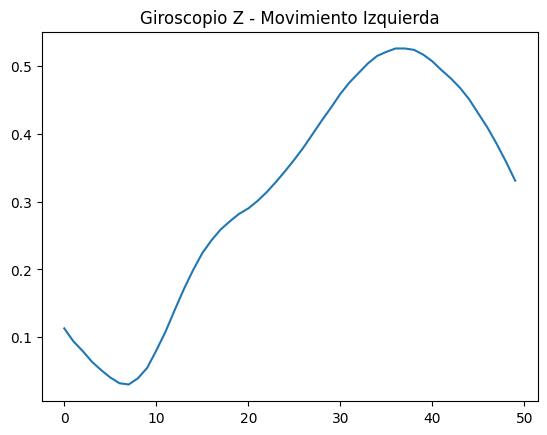

In [ ]:
import matplotlib.pyplot as plt


plt.plot(ventanas_izquierda[0]["GyroZ"])
plt.title("Giroscopio Z - Movimiento Izquierda")
plt.show()

In [ ]:
import os
import pandas as pd


def crear_ventanas_y_etiquetar(ruta_archivo, etiqueta, ventana_muestras=50, solapamiento=25):

    datos = pd.read_csv(ruta_archivo)

    ventanas = []
    etiquetas = []
    inicio = 0


    columnas_requeridas = {'time', 'GyroX', 'GyroY', 'GyroZ', 'AccelX', 'AccelY', 'AccelZ'}
    if not columnas_requeridas.issubset(datos.columns):
        raise ValueError(f"Archivo {ruta_archivo} no tiene las columnas requeridas")


    while inicio + ventana_muestras <= len(datos):
        fin = inicio + ventana_muestras
        ventana = datos.iloc[inicio:fin].copy()
        ventanas.append(ventana)
        etiquetas.append(etiqueta)
        inicio += solapamiento

    return ventanas, etiquetas


ruta_carpeta = "/content/drive/MyDrive/sensadoFisio"


mapeo_etiquetas = {
    "rotIzq_Gyros_Accel.csv": "rot_izquierda",
    "rotderecha_Accel_Gyro.csv": "rot_derecha",
    "upDown_Accel_Gyro.csv": "arriba",
    "upLeft_Gyro_Accel.csv": "izquierdoArm"
}


todas_ventanas = []
todas_etiquetas = []

for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith(".csv") and archivo in mapeo_etiquetas:
        try:
            ruta_completa = os.path.join(ruta_carpeta, archivo)
            ventanas, etiquetas = crear_ventanas_y_etiquetar(
                ruta_completa,
                mapeo_etiquetas[archivo],
                ventana_muestras=50,
                solapamiento=25
            )
            todas_ventanas.extend(ventanas)
            todas_etiquetas.extend(etiquetas)
        except Exception as e:
            print(f"Error procesando {archivo}: {str(e)}")
    else:
        print(f"Archivo {archivo} ignorado")


if todas_ventanas:
    dataset_final = pd.concat(todas_ventanas, ignore_index=True)
else:
    raise ValueError("No se encontraron archivos válidos para procesar")

In [ ]:

print(dataset_final.head())
print("\nDistribución de etiquetas:")
print(pd.Series(todas_etiquetas).value_counts())

     time  GyroX  GyroY  GyroZ  AccelX  AccelY  AccelZ
0  0.0223 -0.216  0.468  0.567    6.13   -7.76  -0.371
1  0.0246 -0.229  0.479  0.560    6.13   -7.77  -0.321
2  0.0270 -0.243  0.492  0.548    6.12   -7.72  -0.270
3  0.0294 -0.249  0.502  0.538    6.12   -7.73  -0.223
4  0.0317 -0.258  0.510  0.527    6.14   -7.73  -0.175

Distribución de etiquetas:
izquierdoArm     3044
arriba           3044
rot_izquierda    3044
rot_derecha      3044
Name: count, dtype: int64


In [ ]:
dataset_final.to_csv('window_label_fis.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
def extraer_caracteristicas(ventana):
    features = {}

    # Características para cada eje del giroscopio (X, Y, Z)
    for eje in ['X', 'Y', 'Z']:
        col_gyro = f'Gyro{eje}'
        features[f'{col_gyro}_mean'] = ventana[col_gyro].mean()
        features[f'{col_gyro}_std'] = ventana[col_gyro].std()
        features[f'{col_gyro}_max'] = ventana[col_gyro].max()
        features[f'{col_gyro}_min'] = ventana[col_gyro].min()


    for eje in ['X', 'Y', 'Z']:
        col_accel = f'Accel{eje}'
        features[f'{col_accel}_mean'] = ventana[col_accel].mean()
        features[f'{col_accel}_std'] = ventana[col_accel].std()
        features[f'{col_accel}_max'] = ventana[col_accel].max()
        features[f'{col_accel}_min'] = ventana[col_accel].min()

    return features


X_features = [extraer_caracteristicas(v) for v in todas_ventanas]

df_entrenamiento = pd.DataFrame(X_features)

# etiquetar
df_entrenamiento["etiqueta"] = todas_etiquetas

## Extraemos las caracteristicas para cada eje de cada movimiento como un promedio

In [ ]:
print("\nDataset de entrenamiento:")
print(df_entrenamiento.head())

print("\nDistribución de etiquetas:")
print(df_entrenamiento["etiqueta"].value_counts())


Dataset de entrenamiento:
   GyroX_mean  GyroX_std  GyroX_max  GyroX_min  GyroY_mean  GyroY_std  \
0   -0.177820   0.074437    -0.0827     -0.275    0.357165   0.177207   
1   -0.136278   0.042584    -0.0827     -0.216    0.134977   0.176273   
2   -0.150738   0.033514    -0.0919     -0.216    0.178092   0.170334   
3   -0.097349   0.072124     0.0755     -0.171    0.205631   0.124151   
4    0.052609   0.127809     0.2070     -0.167   -0.029901   0.155170   

   GyroY_max  GyroY_min  GyroZ_mean  GyroZ_std  ...  AccelX_min  AccelY_mean  \
0      0.531    -0.1080    0.363520   0.088291  ...        5.53      -8.0214   
1      0.408    -0.1440    0.207332   0.113487  ...        5.53      -8.1640   
2      0.338    -0.1440    0.044239   0.065534  ...        5.57      -8.2130   
3      0.338    -0.0686   -0.063461   0.070701  ...        5.57      -8.1516   
4      0.242    -0.2050   -0.175828   0.081360  ...        5.83      -8.0776   

   AccelY_std  AccelY_max  AccelY_min  AccelZ_mean  A

In [ ]:
X_features = [extraer_caracteristicas(v) for v in todas_ventanas]


df_entrenamiento = pd.DataFrame(X_features)
df_entrenamiento["etiqueta"] = todas_etiquetas

# Guardar dataset
df_entrenamiento.to_csv("dataset_final_todas_caracteristicas.csv", index=False)